In [1]:
# import nemo.collections.asr as nemo_asr
import requests

import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
# from moviepy.editor import VideoFileClip, clips_array
from pathlib import Path

from tqdm import tqdm
from pymilvus import MilvusClient
client = MilvusClient( 
    "http://localhost:19530"
)

In [9]:
SEGMENT_STEP = 1
VIDEO_ID = "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p"

i = 1539

# for i in range(1400, 1800, SEGMENT_STEP):
embedding = client.query(
    collection_name="audio_segments_whisper",
    filter = f"video_id == '{VIDEO_ID}.mp4' and segment_start == {i}"
)
embedding = embedding[0]["embedding"]
data = client.search(
    collection_name="audio_segments_whisper",
    data=[embedding],
    output_fields=["id", "video_id", "segment_start"],
    limit=100
)[0]
print(data)

[{'id': 450443658880617983, 'distance': 0.0, 'entity': {'id': 450443658880617983, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1539}}, {'id': 450443658880617985, 'distance': 1.4422783851623535, 'entity': {'id': 450443658880617985, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1540}}, {'id': 450443658880617981, 'distance': 2.5262527465820312, 'entity': {'id': 450443658880617981, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1538}}, {'id': 450443658880617987, 'distance': 3.4384140968322754, 'entity': {'id': 450443658880617987, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1541}}, {'id': 450443658880628947, 'distance': 3.7719058990478516, 'entity': {'id': 450443658880628947, 'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4', 'segment_start': 544}}, {'id': 450443658880628955, 'distance': 3.7774946689605713, 'entity': {'id': 450443658880628955, 'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4', 's

In [10]:
search_result = {}
for item in data:
    video_id = item['entity']['video_id']
    segment_start = item['entity']['segment_start']
    
    if video_id not in search_result:
        search_result[video_id] = []

    search_result[video_id].append(segment_start)

In [11]:
search_result

{'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4': [1539,
  1540,
  1538,
  1541,
  1542,
  1537,
  1543,
  1544,
  1247,
  84,
  1565,
  393,
  1655,
  548,
  1075,
  1633,
  1246,
  1617,
  978,
  1100,
  1616,
  1248,
  1612,
  317,
  472,
  368,
  532,
  1634],
 'ded3d179001b3f679a0101be95405d2c.mp4': [544,
  548,
  545,
  549,
  543,
  550,
  542,
  551,
  155,
  156,
  541,
  552,
  84,
  154,
  142,
  255,
  176,
  573,
  52,
  157,
  177,
  51,
  277,
  83,
  574,
  553,
  241,
  77],
 't9j5gg42w6s7f62uybhtc51aj5nq9vxd.mp4': [218,
  149,
  91,
  92,
  540,
  151,
  150,
  631,
  501,
  93,
  217,
  219,
  525,
  220,
  236,
  964],
 '3y78kqwdr5lbtsy9tb76n5ylbcrainsx.mp4': [1374,
  95,
  1221,
  1222,
  638,
  397,
  1375,
  1382,
  335,
  1160,
  96,
  1330,
  399,
  639],
 'aozskym3m7s9ibw5xpgca7m5jqe240vs.mp4': [795,
  776,
  797,
  682,
  893,
  184,
  796,
  186,
  737,
  738,
  469,
  777,
  187,
  813]}

In [12]:
distances = [elem["distance"] for elem in data]

<Axes: ylabel='Count'>

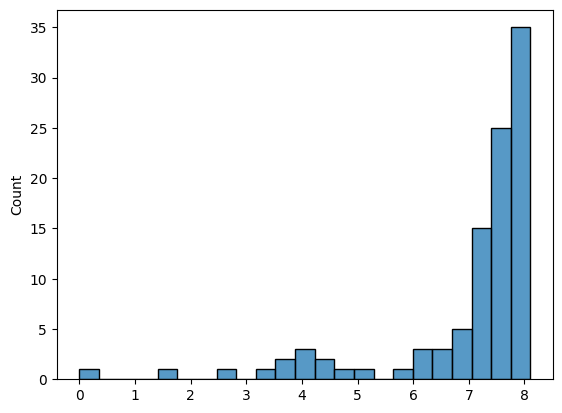

In [13]:
import seaborn as sns
sns.histplot(data=distances)

In [18]:
for elem in data:
    if elem["distance"]  <  5:
        print(elem)

{'id': 450443658880617983, 'distance': 0.0, 'entity': {'id': 450443658880617983, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1539}}
{'id': 450443658880617985, 'distance': 1.4422783851623535, 'entity': {'id': 450443658880617985, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1540}}
{'id': 450443658880617981, 'distance': 2.5262527465820312, 'entity': {'id': 450443658880617981, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1538}}
{'id': 450443658880617987, 'distance': 3.4384140968322754, 'entity': {'id': 450443658880617987, 'video_id': 'ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4', 'segment_start': 1541}}
{'id': 450443658880628947, 'distance': 3.7719058990478516, 'entity': {'id': 450443658880628947, 'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4', 'segment_start': 544}}
{'id': 450443658880628955, 'distance': 3.7774946689605713, 'entity': {'id': 450443658880628955, 'video_id': 'ded3d179001b3f679a0101be95405d2c.mp4', 'segment

In [ ]:
!